### In Data Analysis We will Analyze To Find out the below stuff
1. Missing Values and then reltn of missing value with dependent feature
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature(SalePrice)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
train = pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Missing Values

In [4]:
feature_nan = [ feature for feature in train.columns if train[feature].isnull().sum() >=1]
for feature in feature_nan:
    print(f"{feature} :  {train[feature].isnull().mean()}  : {train[feature].dtype} ")

LotFrontage :  0.1773972602739726  : float64 
Alley :  0.9376712328767123  : object 
MasVnrType :  0.005479452054794521  : object 
MasVnrArea :  0.005479452054794521  : float64 
BsmtQual :  0.025342465753424658  : object 
BsmtCond :  0.025342465753424658  : object 
BsmtExposure :  0.026027397260273973  : object 
BsmtFinType1 :  0.025342465753424658  : object 
BsmtFinType2 :  0.026027397260273973  : object 
Electrical :  0.0006849315068493151  : object 
FireplaceQu :  0.4726027397260274  : object 
GarageType :  0.05547945205479452  : object 
GarageYrBlt :  0.05547945205479452  : float64 
GarageFinish :  0.05547945205479452  : object 
GarageQual :  0.05547945205479452  : object 
GarageCond :  0.05547945205479452  : object 
PoolQC :  0.9952054794520548  : object 
Fence :  0.8075342465753425  : object 
MiscFeature :  0.963013698630137  : object 


## Checking the relationship of missing Value with Dependent feature(sale price)

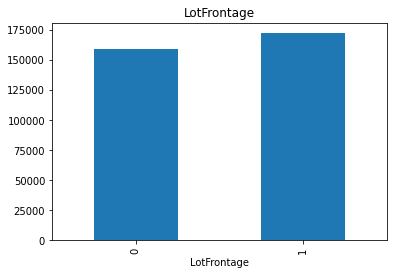

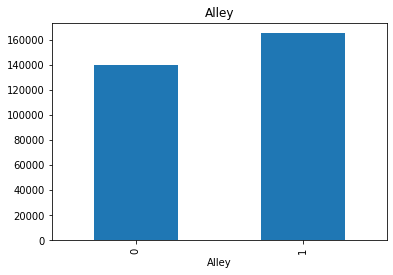

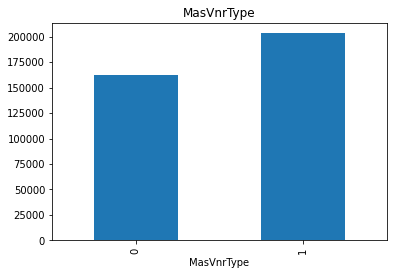

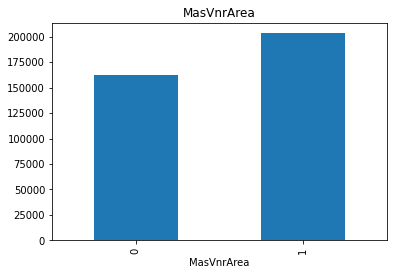

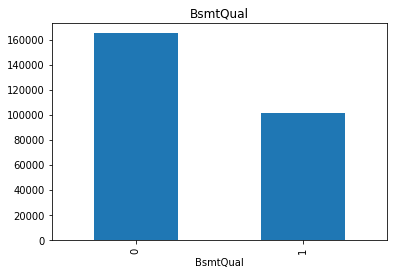

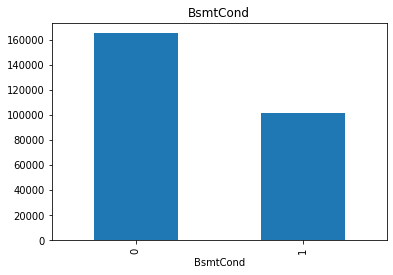

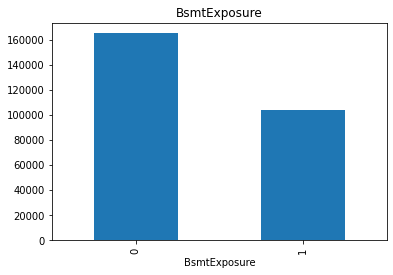

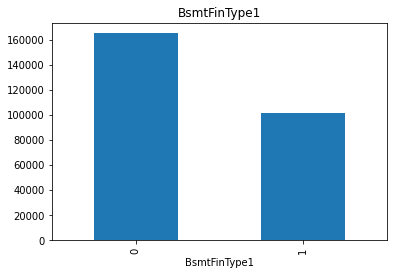

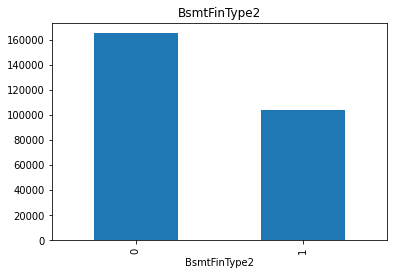

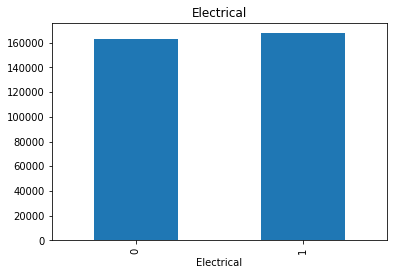

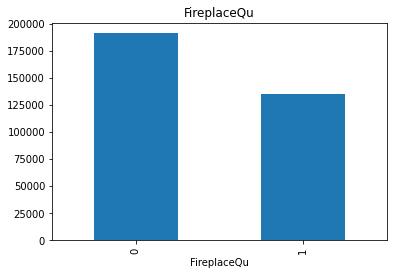

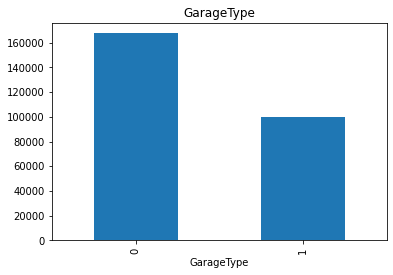

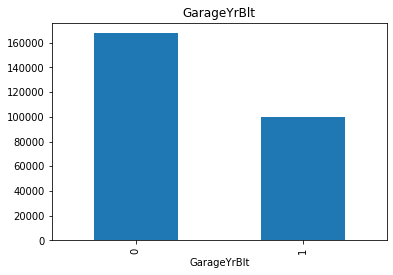

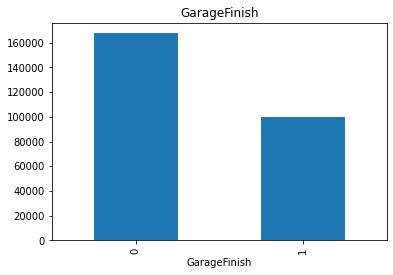

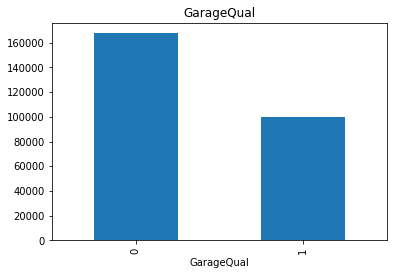

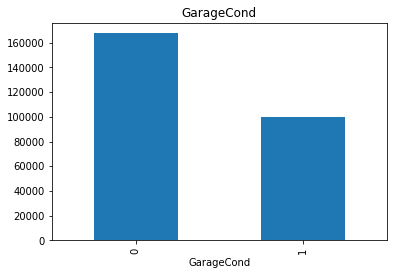

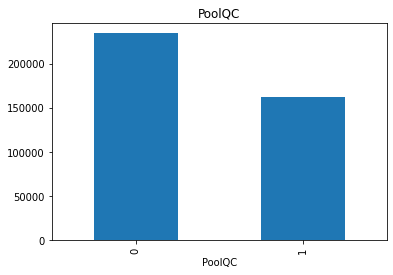

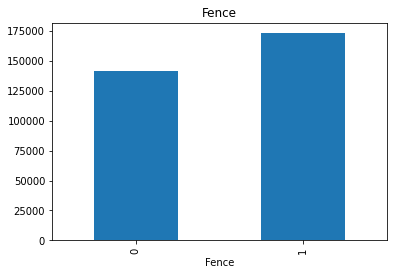

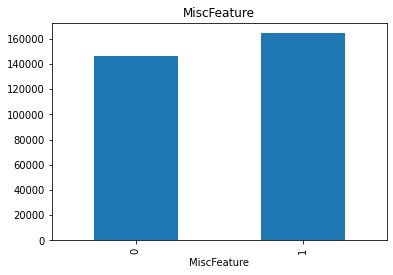

In [5]:
## here we use a approch we mark down the nan value with 1 and not null value with 0 and then group them

for feature in feature_nan:
    data = train.copy()
    # where nan = 1 and not null = 0
    data[feature] = np.where(train[feature].isnull(),1,0)
    # group by and ploting
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

#### Conclusion
Here we can see there are some relationship b/w the missing values and dependent feature so we need to replace these values

## Features Numerical ,Continous ,Temporal Variables(Eg: Datetime Variables)

In [6]:
train.shape

(1460, 81)

### Numerical Features

In [8]:
numerical_features = [feature for feature in train.columns if train[feature].dtype != 'O' ]

### Temporal Variables(Eg: Datetime Variables)
From the Dataset we have 4 year variables. We have extract information from the datetime variables like no of years or no of days. One example in this specific scenario can be difference in years between the year the house was built and the year the house was sold. We will be performing this analysis in the Feature Engineering which is the next video.

In [9]:
year_feature = [ feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

### Discrete Feature

In [10]:
discrete_feature = [feature for feature in numerical_features if len(train[feature].value_counts()) < 25 and
                    feature not in year_feature + ['Id'] ]

### Continuous Features

In [11]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_feature and
                       feature not in year_feature + ['Id'] ]

## Year features (Temporal Variables) with Target feature

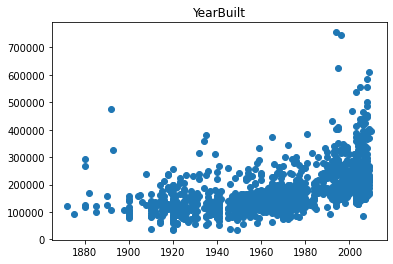

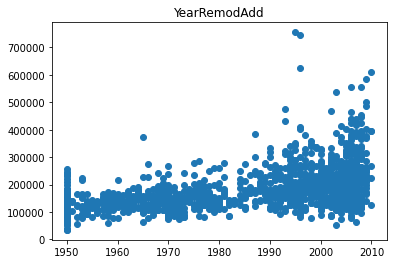

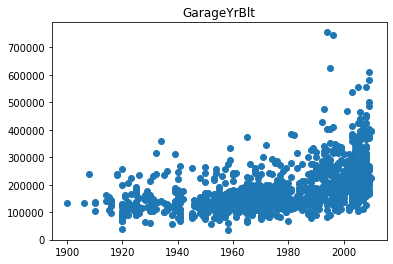

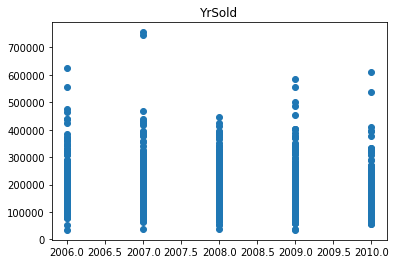

In [19]:
for feature in year_feature:
    data = train.copy()
    
    #data.groupby(feature)['SalePrice'].median().plot()
    plt.scatter(data[feature],data['SalePrice'])
    plt.title(feature)
    plt.show()

### Observation:
here we can see YrSold is not showing the correct relationship with data, because it is decresing sold price but it need to be increse as year increse.

### Conclusion
if we substract the all values with their Yrsold value then we can get the Year of build , remofification year , garage build years .

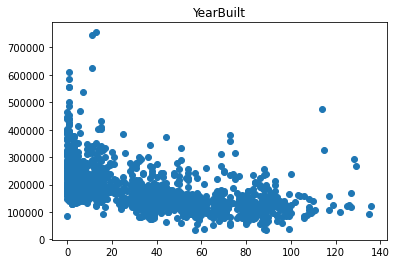

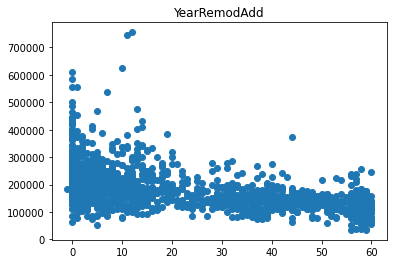

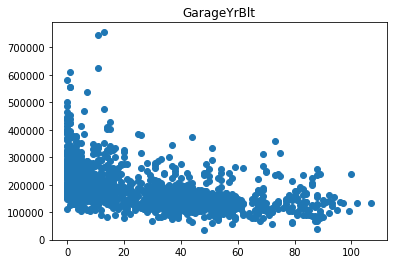

In [18]:
for feature in year_feature:
    if feature != 'YrSold':
        data = train.copy()
        
        data[feature] = data['YrSold'] - data[feature]
        
        plt.scatter(data[feature],data['SalePrice'])
        plt.title(feature)
        plt.show()

### Result:
here we can see we use the YrSold feature and all the features are giving monotoic relationship with Target feature

## Discrete Feature with Target feature

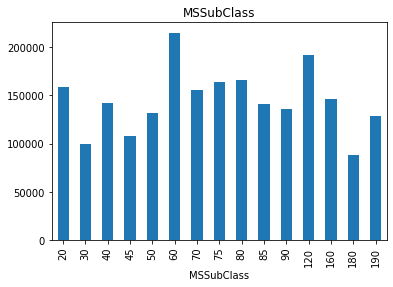

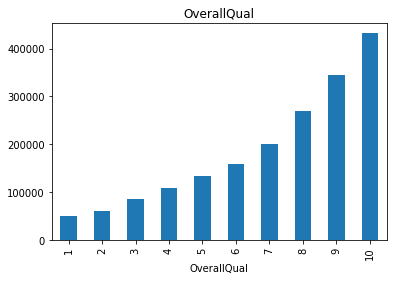

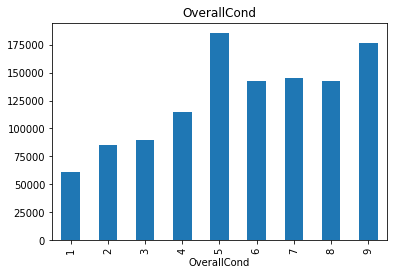

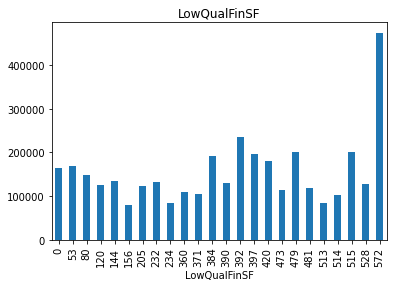

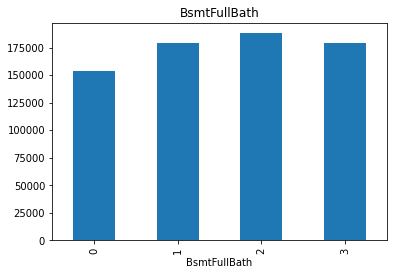

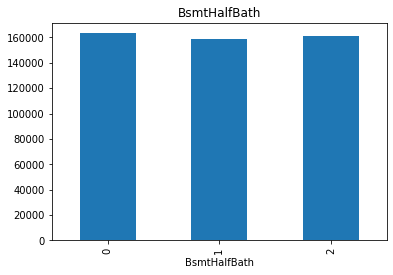

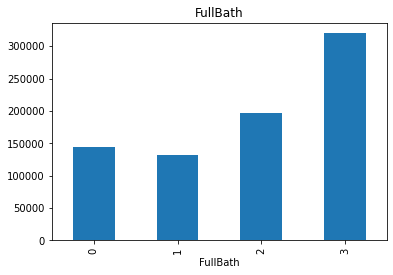

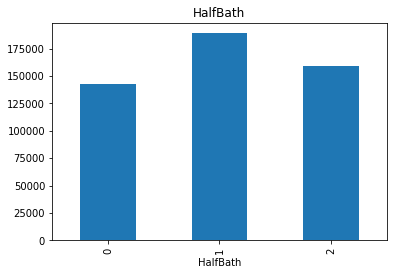

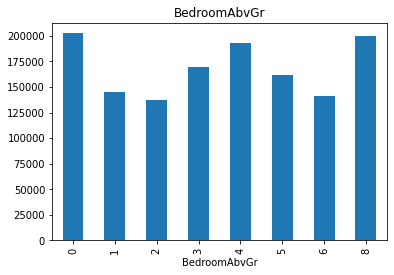

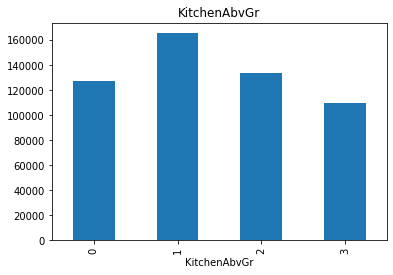

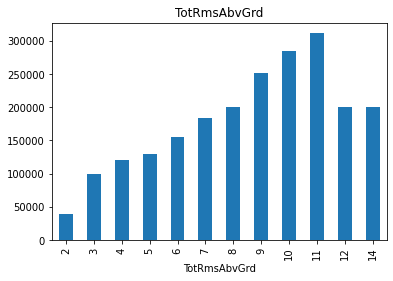

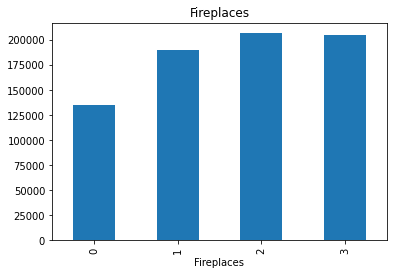

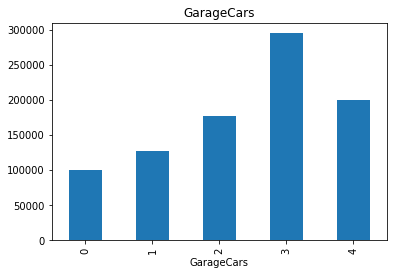

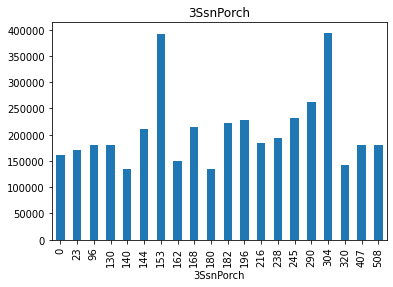

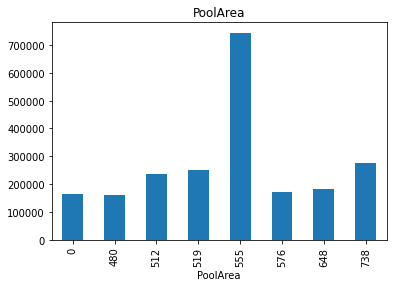

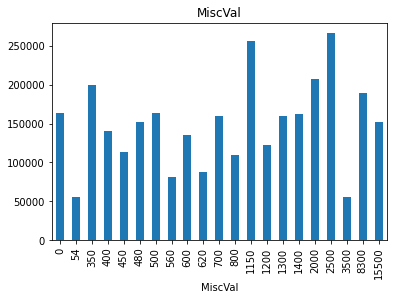

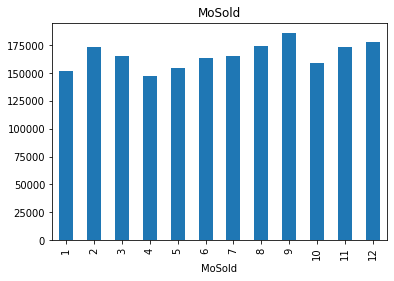

In [13]:
for feature in discrete_feature:
    data = train.copy()
    
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

### Conclusion:
here we can clearly see with some feature has a monotonic relationship with target variable

## Continuous Features with Target feature

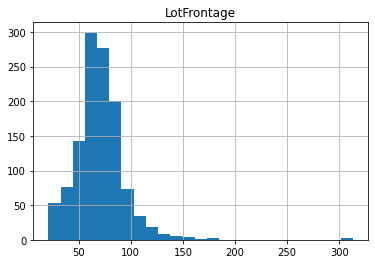

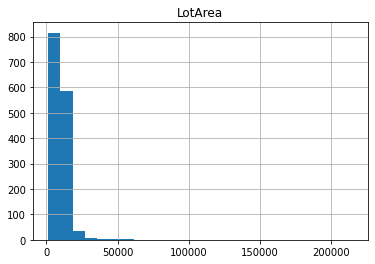

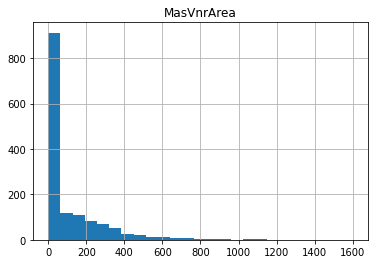

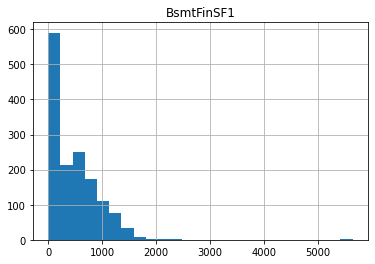

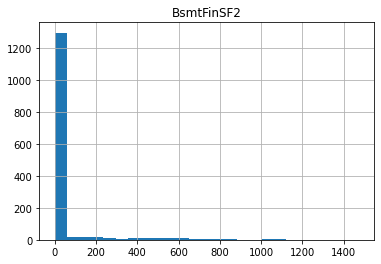

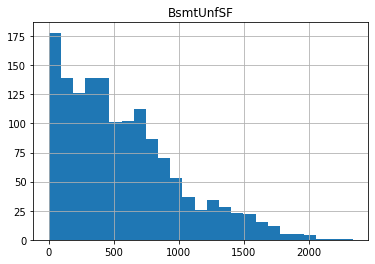

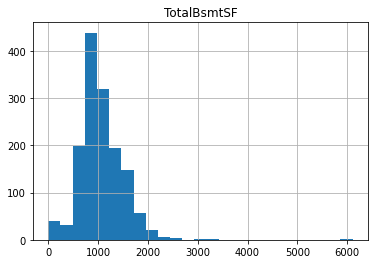

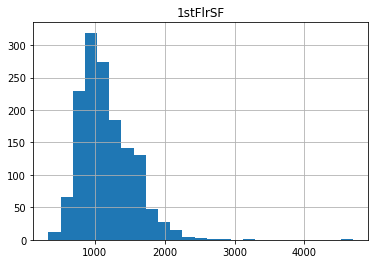

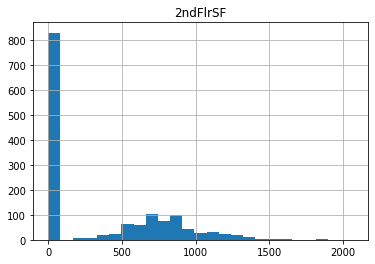

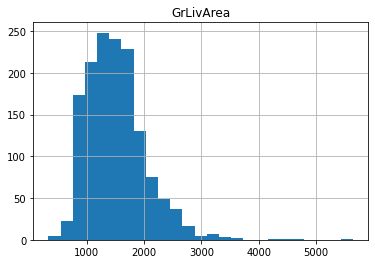

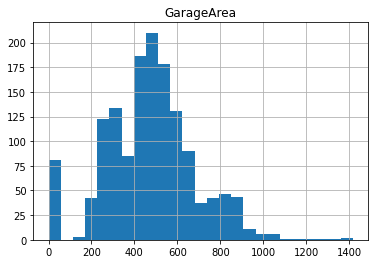

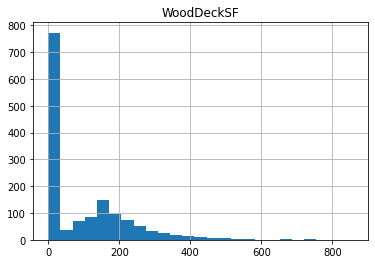

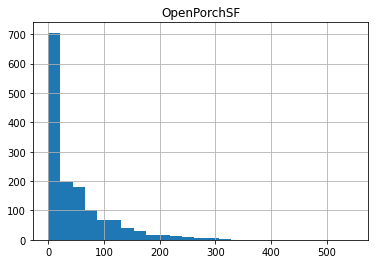

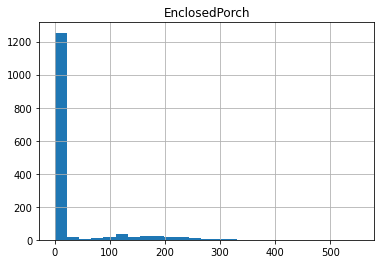

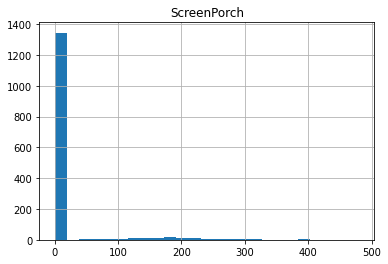

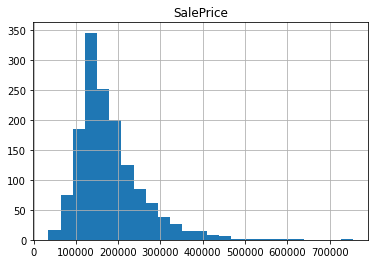

In [22]:
for feature in continuous_features:
    data = train.copy()
    
    #plt.scatter(data[feature],data['SalePrice'])
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('SalesPrice')
    plt.title(feature)
    plt.show()

## Observation 
Here we can see only some features are displaying the Normal Distribution and most of the features are Skewed and displaying thr Power Distribution but we need to convert it into the Normal Distribution so it is easy to do feature engineering?

### Conclusion
So we apply the Log Transformation on these features and convert it into the Normal Distribution

### Applying logarithmic transformation
it is simply taking the log values . but if there is 0 present in value so we can not use log() function because log(0) is undefined or infanite we can use log1p or log() + 1 to prevent it

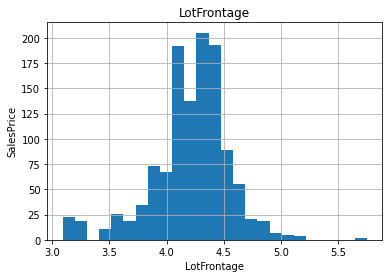

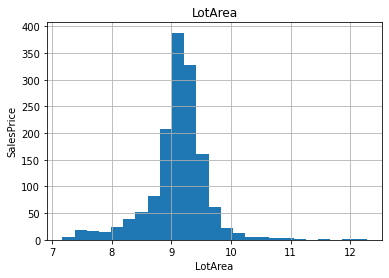

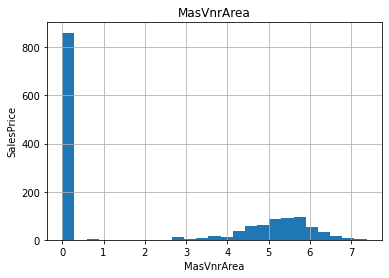

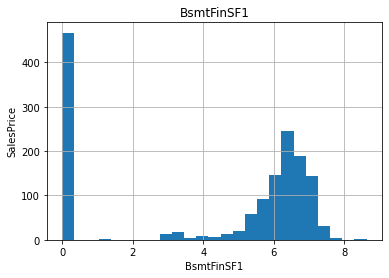

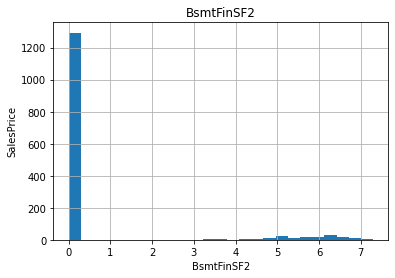

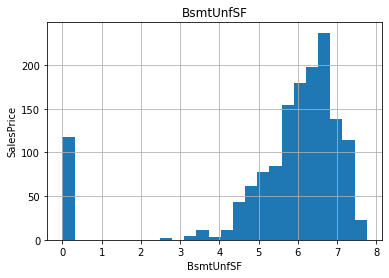

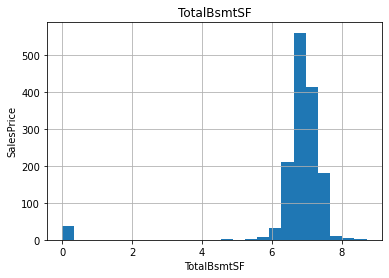

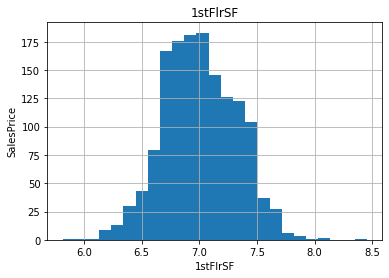

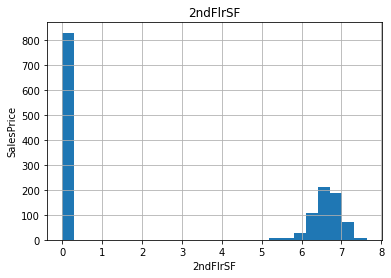

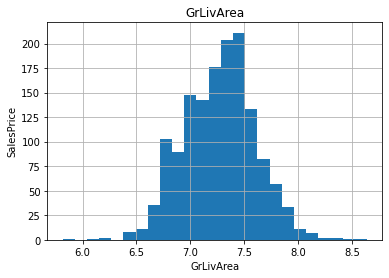

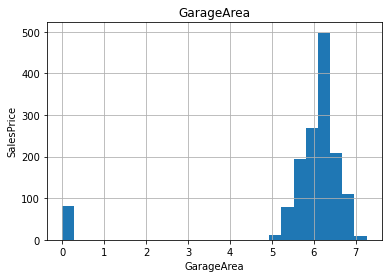

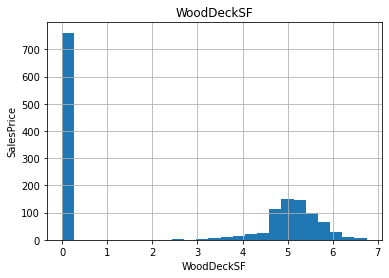

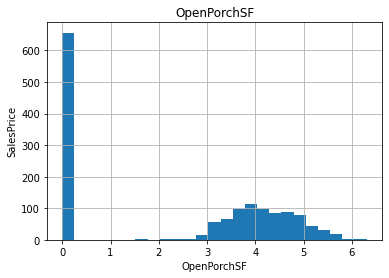

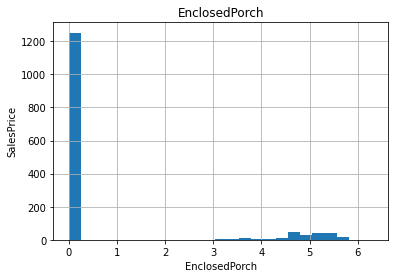

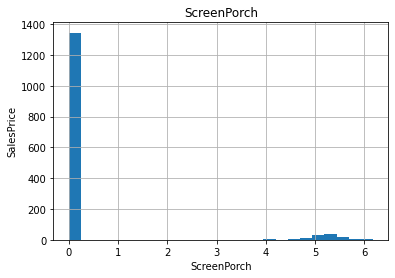

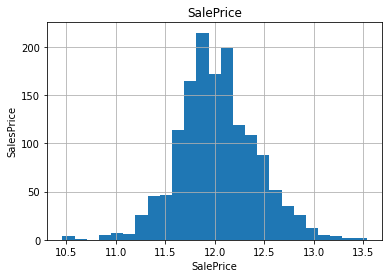

In [25]:
for feature in continuous_features:
    data = train.copy()
    ## doing log transformation
    data[feature] = np.log1p(data[feature])
    
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('SalesPrice')
    plt.title(feature)
    plt.show()

### Result
Here now we can clearly see most of the feature are following in Normal Distribution

## Outliers in Continuous feature ( after log transformation)

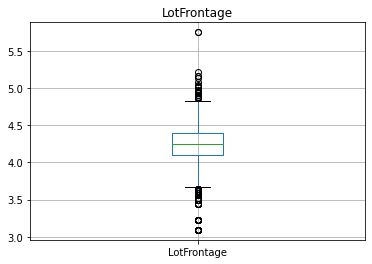

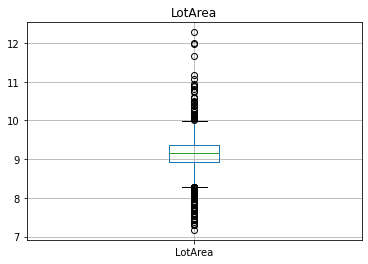

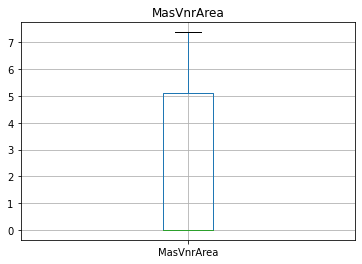

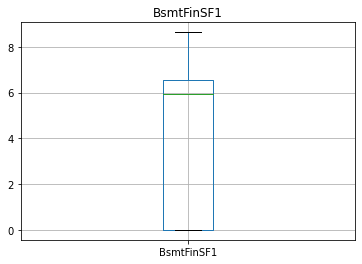

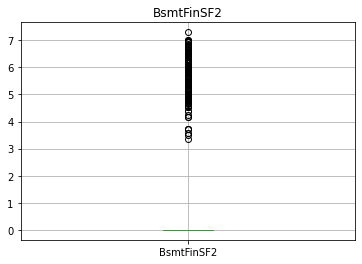

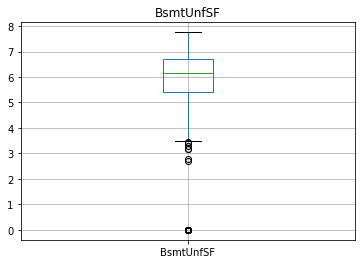

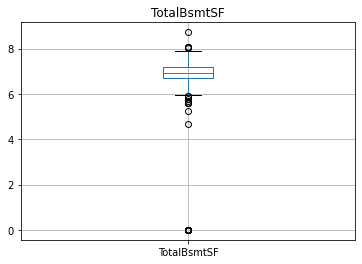

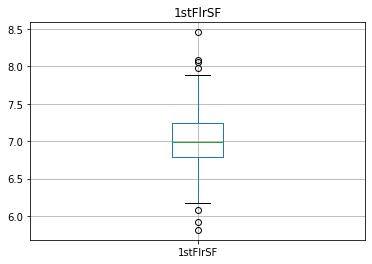

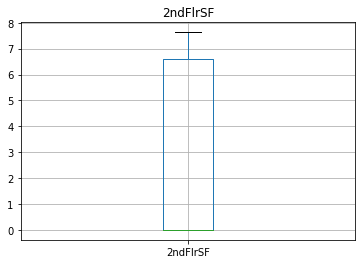

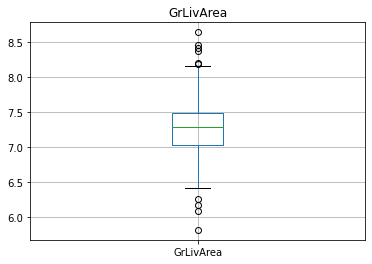

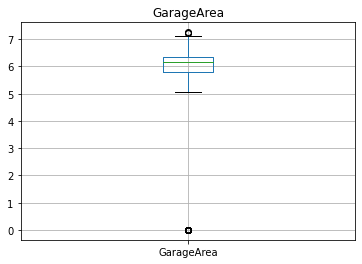

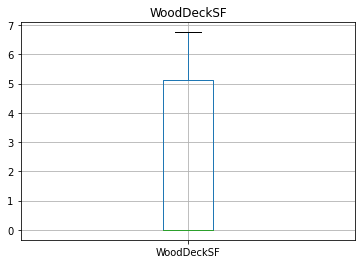

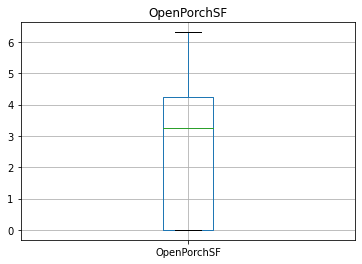

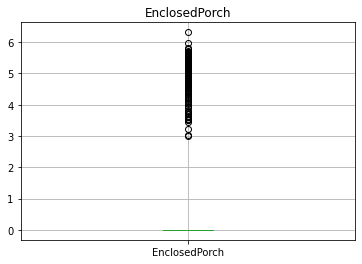

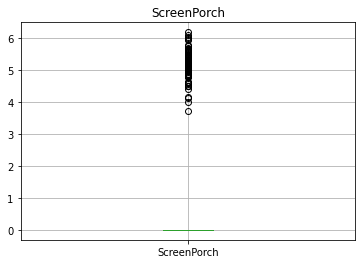

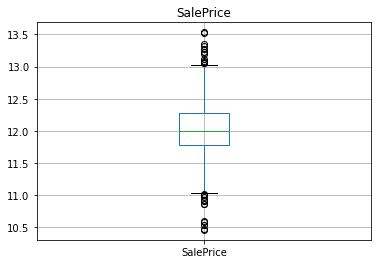

In [26]:
for feature in continuous_features:
    data = train.copy()
    
    # log transformation
    data[feature] = np.log1p(data[feature])
    
    # Outliers using box plot
    data.boxplot(column=feature)
    plt.title(feature)
    plt.show()

### Observation
here we can see there are too many outliers present in data , but there are 0 value in data so some features are acting like there are outliers we can handle it later

## Categorical Features 

In [27]:
categorical_features = [feature for feature in train.columns if train[feature].dtype == 'O']

In [28]:
## seeing how many categories present in features
for feature in categorical_features:
    data = train.copy()
    
    print(f"{feature} : categories: {len(data[feature].unique())}")

MSZoning : categories: 5
Street : categories: 2
Alley : categories: 3
LotShape : categories: 4
LandContour : categories: 4
Utilities : categories: 2
LotConfig : categories: 5
LandSlope : categories: 3
Neighborhood : categories: 25
Condition1 : categories: 9
Condition2 : categories: 8
BldgType : categories: 5
HouseStyle : categories: 8
RoofStyle : categories: 6
RoofMatl : categories: 8
Exterior1st : categories: 15
Exterior2nd : categories: 16
MasVnrType : categories: 5
ExterQual : categories: 4
ExterCond : categories: 5
Foundation : categories: 6
BsmtQual : categories: 5
BsmtCond : categories: 5
BsmtExposure : categories: 5
BsmtFinType1 : categories: 7
BsmtFinType2 : categories: 7
Heating : categories: 6
HeatingQC : categories: 5
CentralAir : categories: 2
Electrical : categories: 6
KitchenQual : categories: 4
Functional : categories: 7
FireplaceQu : categories: 6
GarageType : categories: 7
GarageFinish : categories: 4
GarageQual : categories: 6
GarageCond : categories: 6
PavedDrive : c

## Observation
Here we see there are lots of categories in features , if there are more then 5 or 6 categories then we can not apply the One Hot Encoding for it we need to apply other techniques for converting it into the numerical variables

## Categorical Feature with Target Feature

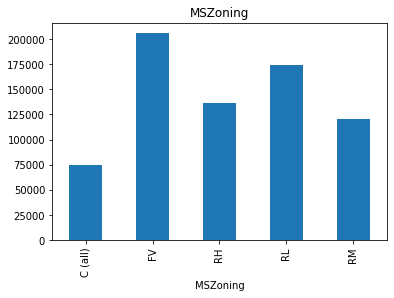

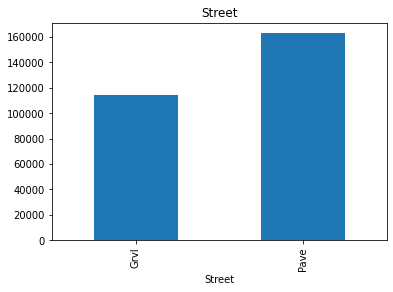

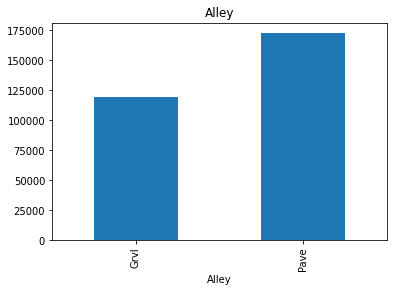

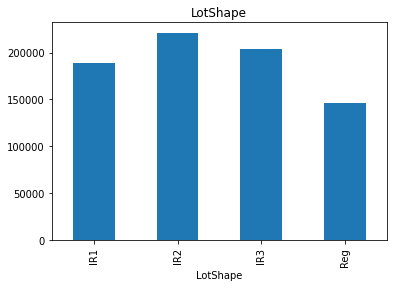

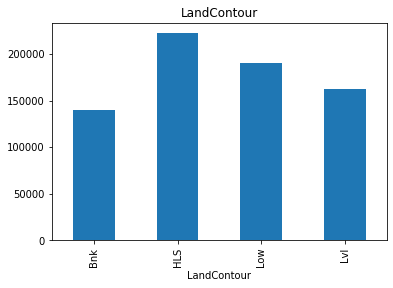

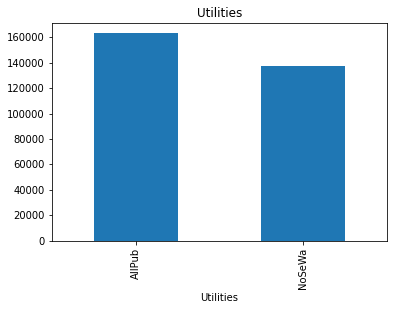

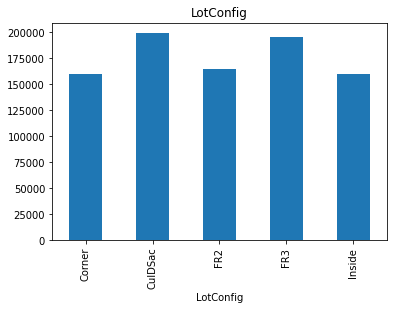

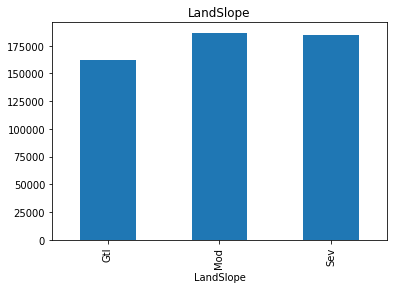

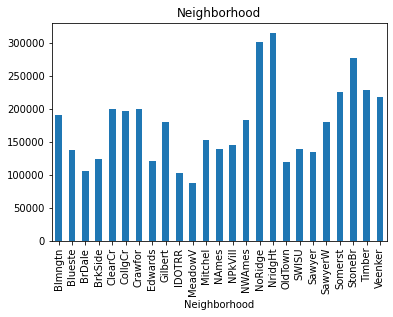

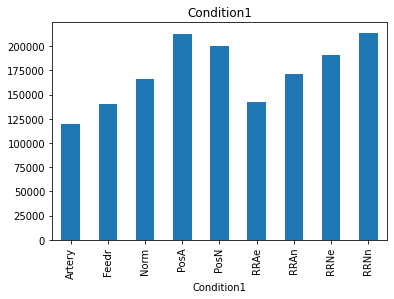

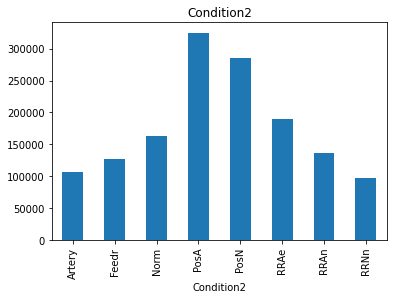

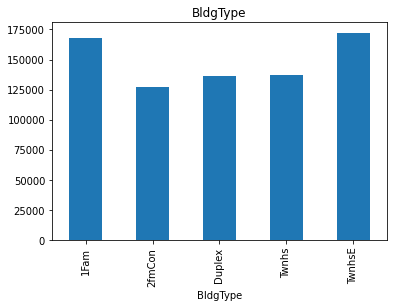

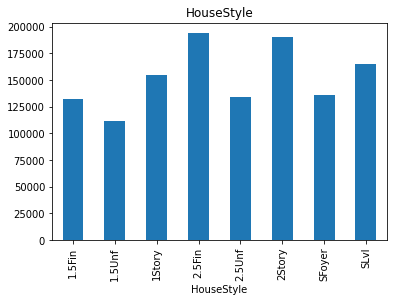

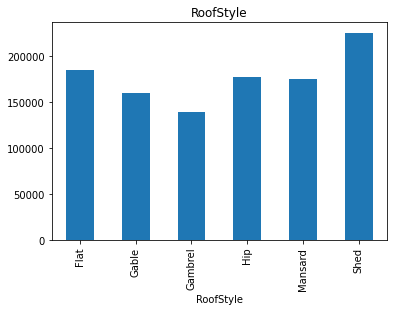

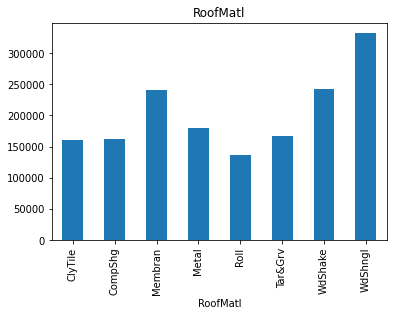

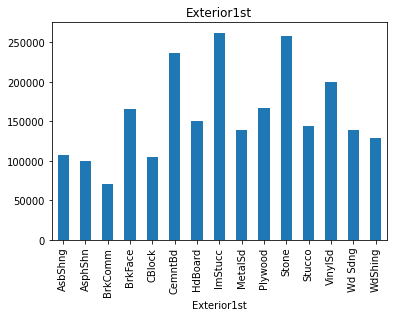

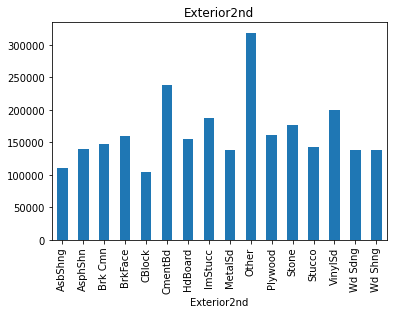

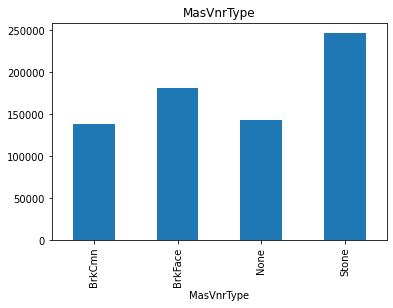

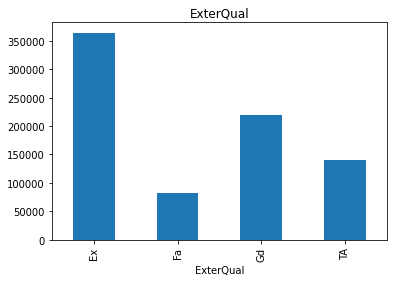

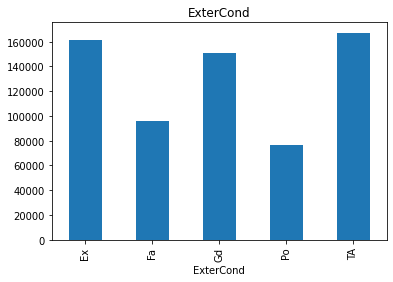

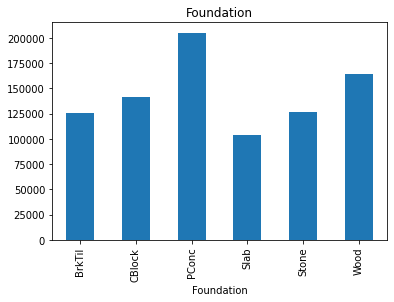

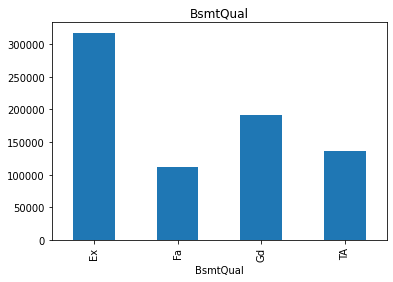

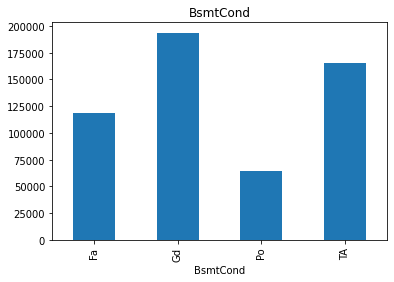

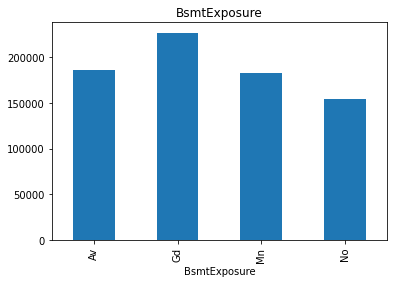

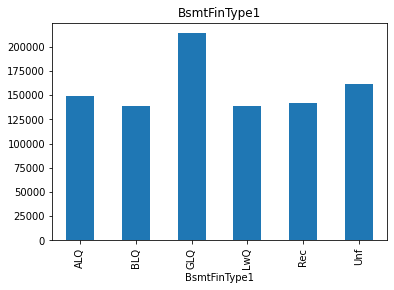

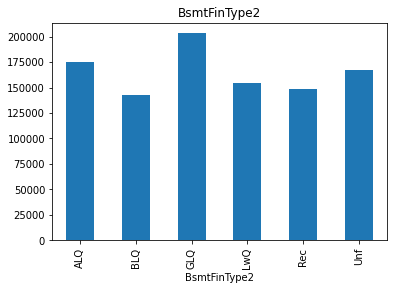

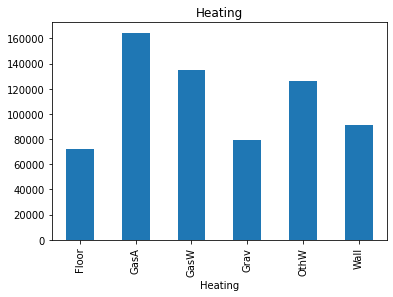

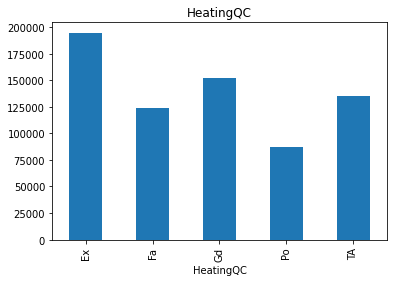

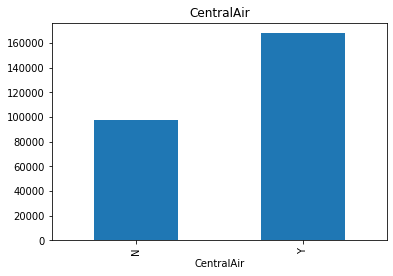

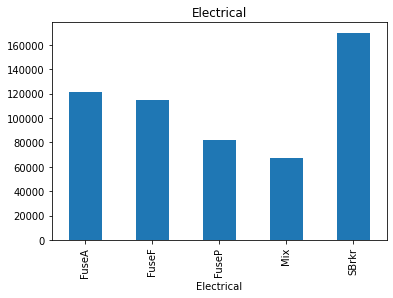

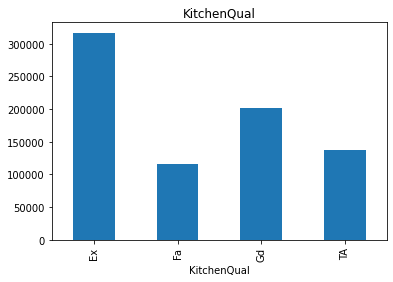

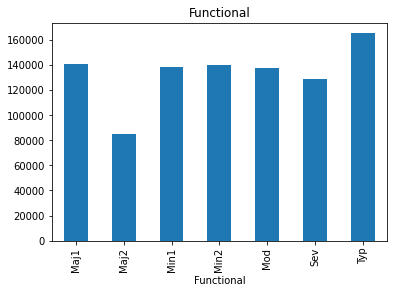

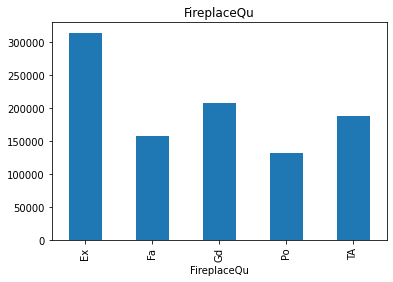

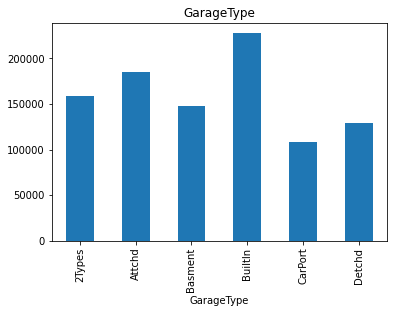

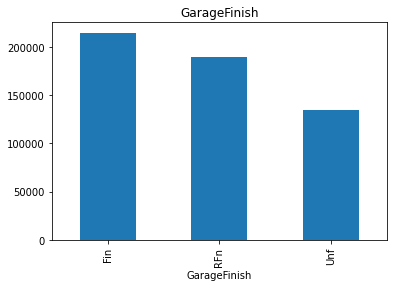

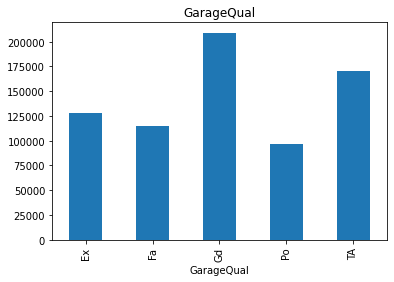

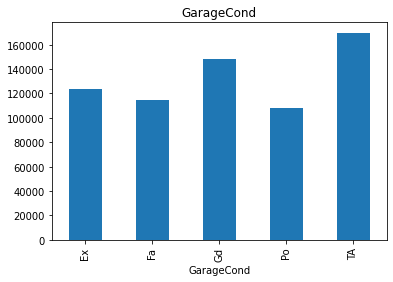

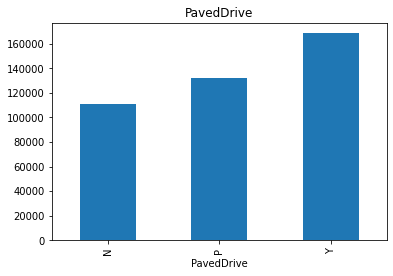

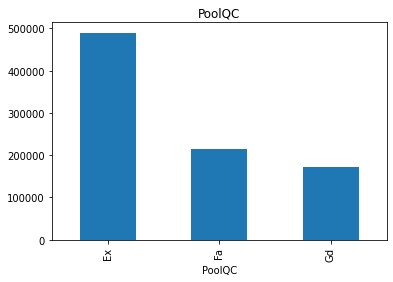

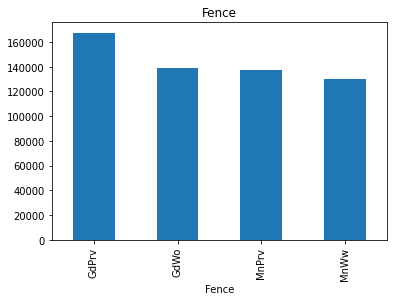

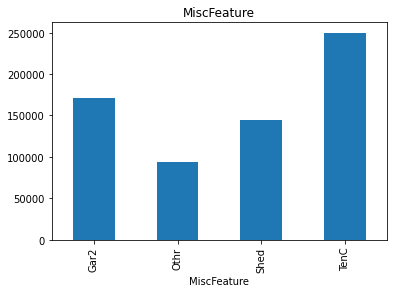

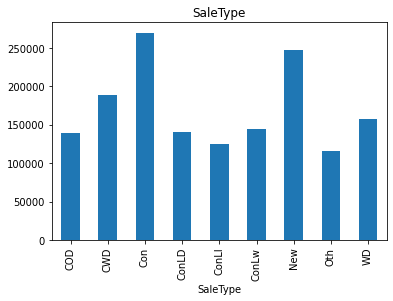

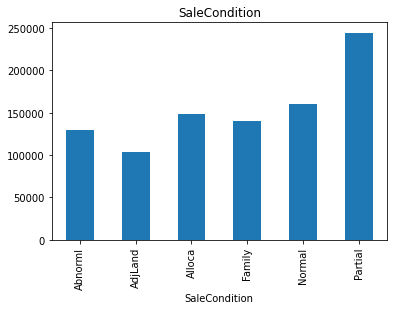

In [30]:
for feature in categorical_features:
    data = train.copy()
    
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()